# ID5059 Datamining Project - 190003597

# 1. Importing Data and Libraries

Importing all the packages I will be using in this project:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

Now importing the rawdata:

In [2]:
rawdata =  pd.read_csv("vehicles.csv")

In [3]:
print(rawdata.head(3))

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   

         region                       region_url  price  year manufacturer  \
0      prescott  https://prescott.craigslist.org   6000   NaN          NaN   
1  fayetteville     https://fayar.craigslist.org  11900   NaN          NaN   
2  florida keys      https://keys.craigslist.org  21000   NaN          NaN   

  model condition cylinders  ... size  type paint_color image_url description  \
0   NaN       NaN       NaN  ...  NaN   NaN         NaN       NaN         NaN   
1   NaN       NaN       NaN  ...  NaN   NaN         NaN       NaN         NaN   
2   NaN       NaN       NaN  ...  NaN   NaN         NaN       NaN         NaN   

  county state lat long posting_date  
0    NaN    az NaN  NaN          NaN  
1    NaN   

In [4]:
datacol = []
for col in rawdata.columns:
    datacol.append(col)
print(datacol)

['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'county', 'state', 'lat', 'long', 'posting_date']


# 2.Chosing which features to use

Now as we can see from the data we have many possible features to chose from.
After the intial inspect we can disregard many features instantly:
__id,url,region_url,VIN,image_URL,posting_date.__
Also when considering the scope of this project I decided that I will not be using the description section as it will contain alot of free form text which can be difficult to deal with under the time constraints. 

In [5]:
datatoClean = rawdata[["price","region","year","manufacturer","model","condition","cylinders","fuel","odometer","title_status","transmission","drive","size","type","county","state","lat","long","paint_color"]]

When inspecting the data I can see that there are alot of entries that are NaNs which represent no data. Now when considering features, I want to retain as much data as possible, and when modelling I must get rid of the __NaNs__ (or impute). To avoid losing alot of data and or complications I will not be using any coloums which contain more that 30% __NaN__ values. 

In [6]:
#Iterate through data and print the percentage of NaN values in each column:
numberofrows = datatoClean.shape[0]
for col in datatoClean.columns:
    nans = datatoClean[col].isna().sum()
    perctofNans = (nans/numberofrows)*100
    print(str(col)+": "+str(perctofNans)+"%")

price: 0.0%
region: 0.0%
year: 0.28228073463268366%
manufacturer: 4.133714392803598%
model: 1.2361787856071964%
condition: 40.78523238380809%
cylinders: 41.6224700149925%
fuel: 0.7058189655172414%
odometer: 1.0307346326836582%
title_status: 1.9307533733133435%
transmission: 0.5987631184407797%
drive: 30.586347451274364%
size: 71.7674756371814%
type: 21.752717391304348%
county: 100.0%
state: 0.0%
lat: 1.5341547976011993%
long: 1.5341547976011993%
paint_color: 30.501077586206897%


From this I will be discarding:__Condition, Cylinders, Size, County, Drive, paint_color__
    
    

### 2.1 Considering the Numeric Data

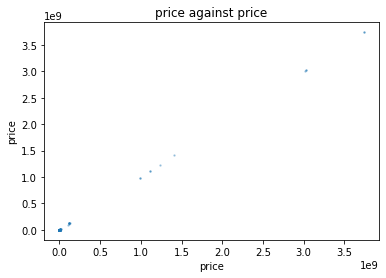

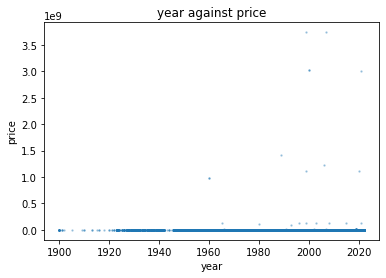

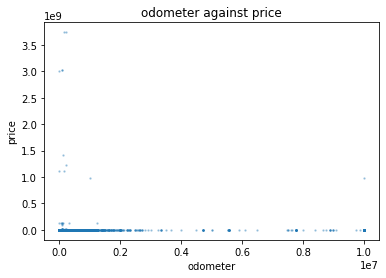

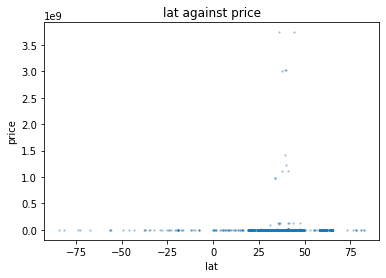

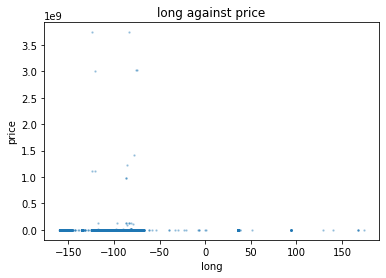

In [7]:
dataToCleanNum = datatoClean[["price","year","odometer","lat","long"]]
dataToCleanNum = dataToCleanNum.dropna()
for col in dataToCleanNum.columns:
    plt.scatter(dataToCleanNum[col],dataToCleanNum["price"],s=2,alpha=0.3)
    plt.title(str(col)+" against price")
    plt.xlabel(str(col))
    plt.ylabel("price")
    plt.show()

As we can see the graphs are dominated by extreme price values. Now to eliminate the chance of outliers and anomalies.
To do I will remove all the data in either 10% extremity when the data is sorted by price.

In [8]:
datatoClean = datatoClean.sort_values(by=["price"])
p1,p2 = np.percentile(datatoClean["price"],[10,90])
print(p1,p2)
datatoClean = datatoClean[(datatoClean.price >= p1)&(datatoClean.price <= p2)]

500.0 37590.0


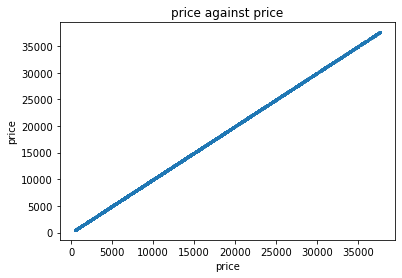

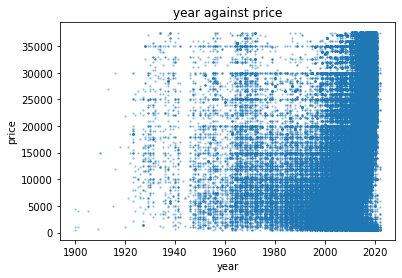

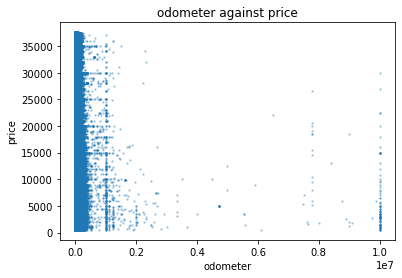

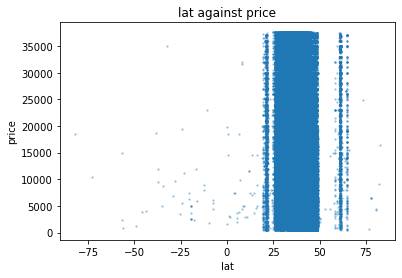

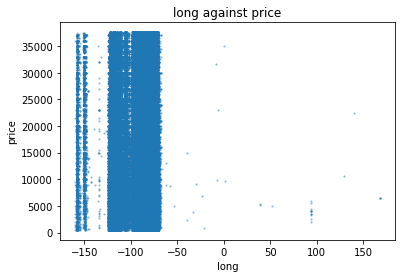

In [9]:
dataToCleanNum = datatoClean[["price","year","odometer","lat","long"]]
dataToCleanNum = dataToCleanNum.dropna()
for col in dataToCleanNum.columns:
    plt.scatter(dataToCleanNum[col],dataToCleanNum["price"],s=2,alpha=0.3)
    plt.title(str(col)+" against price")
    plt.xlabel(str(col))
    plt.ylabel("price")
    plt.show()

From this we can see a clear correlation between __year__ and __price__ of a car. There is seemingly very little correlation between __Lat/long__ and __price__. Therefore I will not be considering these. 

Regarding __Odometer__ there seems to be a trend however due to the peak at 1*10^7 we are unable to see. This is likely to be cause by 1*10^7 being the largest value the website can support for odometer and represents 10000000+. Now for viewing purposes I will replot the odometer graph and implement a logarithmic scale for the x-axis.

(1000, 1000000)

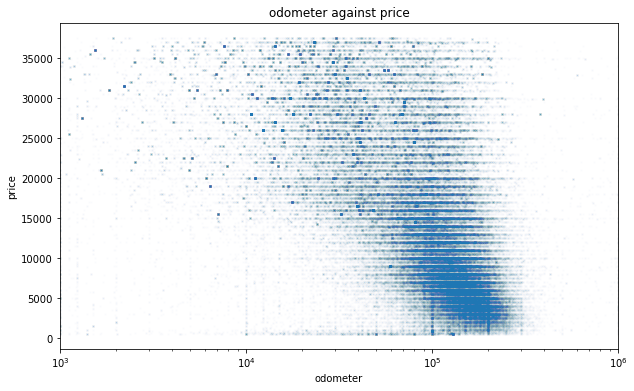

In [10]:
plt.figure(figsize =(10,6))
plt.scatter(dataToCleanNum["odometer"],dataToCleanNum["price"],s=2,alpha=0.01)
plt.title("odometer against price")
plt.xlabel("odometer")
plt.ylabel("price")
plt.xscale("log")
plt.xlim(1000,1000000)

As you can see there is not an very strong trend however it is clear that as the odometer value increases the price is likely to decrease. (Note the scale on the x-axis, the subtle curve in the graph is not as clear due to the scale.)

For peace of mind I will also plot the data on a linear axis in a smaller range of x-values such that we can see any trend in the dense area seen above.  

(0.0, 200000.0)

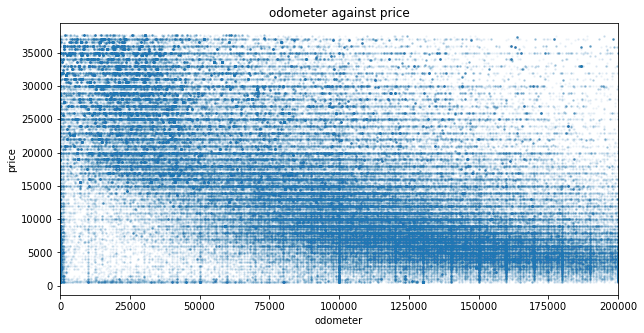

In [11]:
plt.figure(figsize =(10,5))
plt.scatter(dataToCleanNum["odometer"],dataToCleanNum["price"],s=2,alpha=0.05)
plt.title("odometer against price")
plt.xlabel("odometer")
plt.ylabel("price")
plt.xlim(0,200000)

As you can see from the graph above there is a clear link between __odometer__ and __price__ and therefore I will be keeping __odometer__ for now.

#### To conclude my numeric features currently are: Odometer and Year

## 2.2 Considering the Non-Numeric Data

To deal with non numeric data in our model I will be implementing __one-hot encoding__ which simply splits up the categories in a columns into seperate column with binary values representing the category. (Essentially uses a matrix)

One thing to consider when one hot encoding is the number of different values in a column. As the trees work on splitting the data using a feature we ideally want the features contain as much data as possible. When one hot encoding, if there are too many categories in a column the data can be spread out meaning that the splits in the trees are based off a small amount of data meaning that it may not be representative of the whole data set. 
Also if there is too many categories we will create a matrix that is far too large and the returns of this against the computational power required. 

For the scope of this project (and the lack of power my Laptop holds).
Considering this I will be discarding any caloumns with large number of categories. 
Note that if the final model could include more that 4 features a common technique would be to only one hot encode a certain number of the most populus categories then group the rest then test this performance against normal one hot encoding. 

In [12]:
dataNonNum = datatoClean[["price","region","manufacturer","model","fuel","title_status","transmission","type","state"]]
#Code that loops through all the non numeric data and prints the number of unique entries in each column
for col in dataNonNum.columns:
    print(str(col)+": "+str(dataNonNum[col].value_counts().count()))

price: 11821
region: 404
manufacturer: 42
model: 25021
fuel: 5
title_status: 6
transmission: 3
type: 13
state: 51


From this information I can instantly discount both __region__ and __model__. 

In [13]:
dataNonNum = dataNonNum[["price","manufacturer","fuel","title_status","transmission","type","state"]]
#dataNonNum["manufacturer"].unique()

#### Plotting mean values of each unique entry in each column

I will loop through each column then group by unique entries and the mean price of each entry then graph them in ascending order

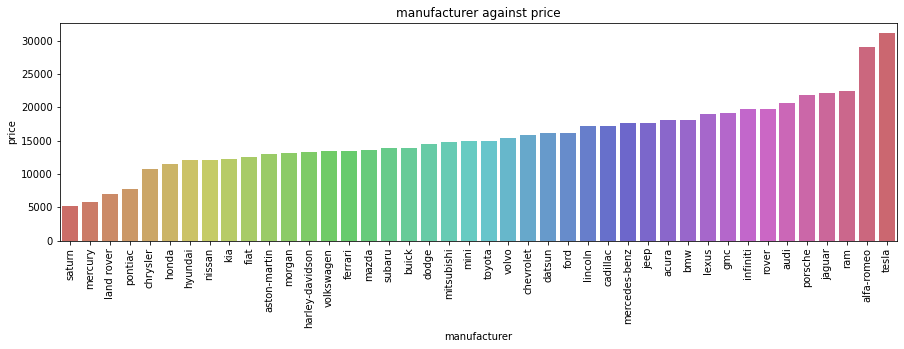

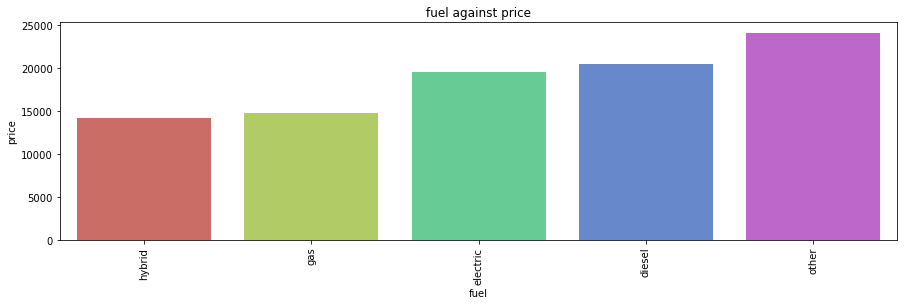

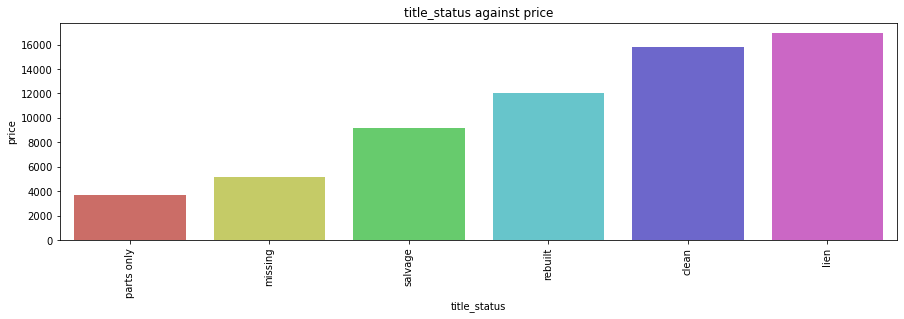

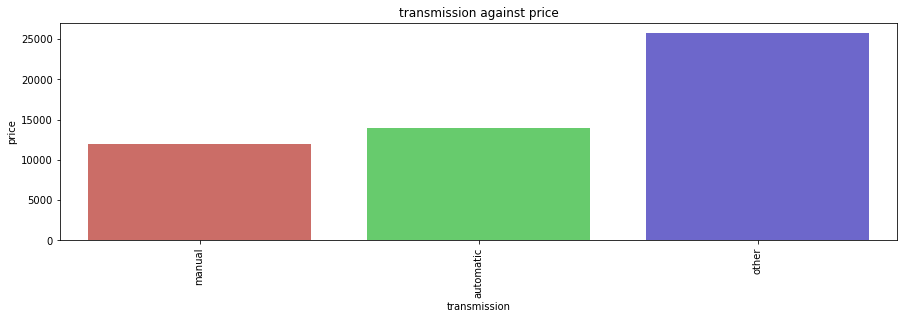

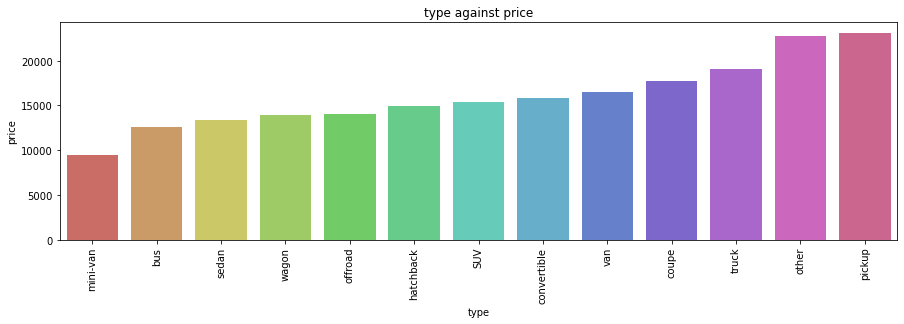

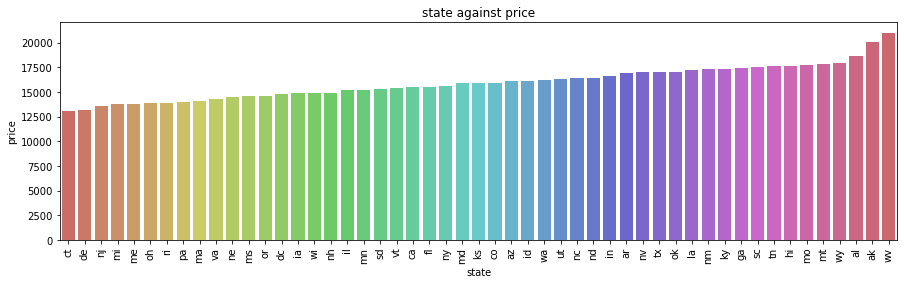

In [14]:
dataNoPrice = dataNonNum.loc[:, dataNonNum.columns != 'price']
for c in dataNoPrice.columns:
    df = dataNonNum.groupby(by=c).mean().reset_index().sort_values(by="price")
    df2 = dataNonNum[col].value_counts().reset_index()
    plt.figure(figsize = (15,4))
    ax = sns.barplot(x=c, y=str("price"), data=df, palette = "hls" )
    tick = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    title = ax.set_title(str(c)+" against price")
    plt.show()

As we can see from the graphs above every feature chosen here shows some correlation between price and the categories. Notebale canidates include: __Manufacturer__ , __title_status__ and __type__.

Now another important factor to consider is the dispersion of the data within these categories as ideally we want a even spread of data between categories such that the splits are significant.



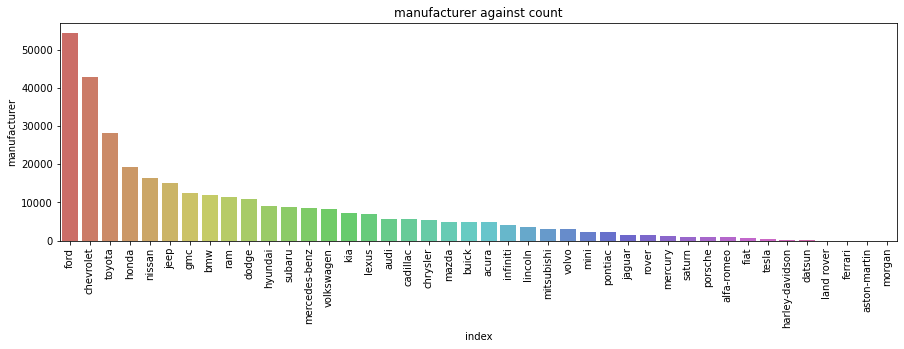

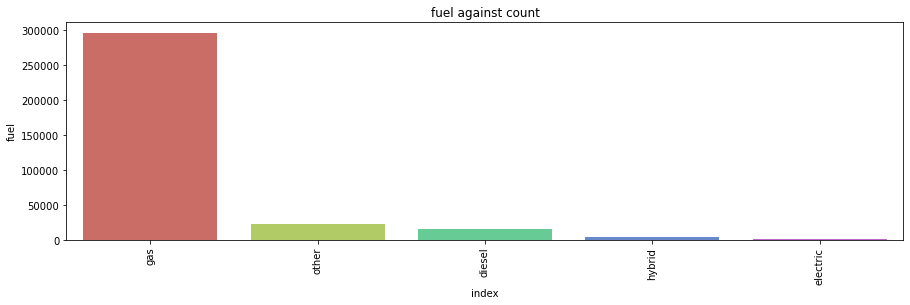

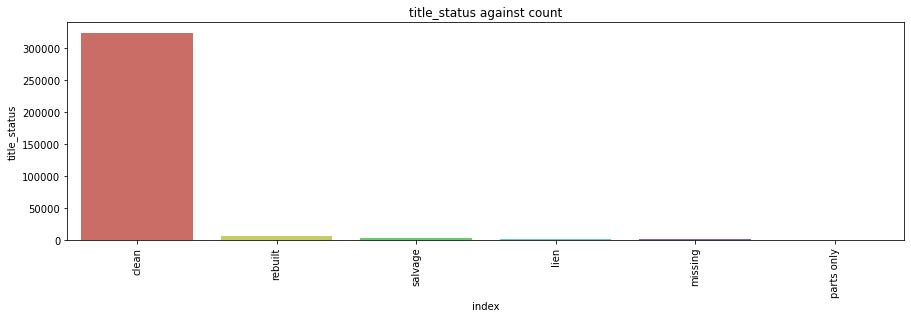

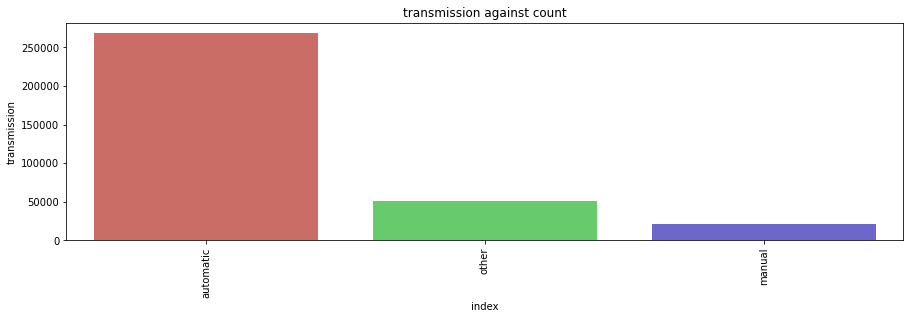

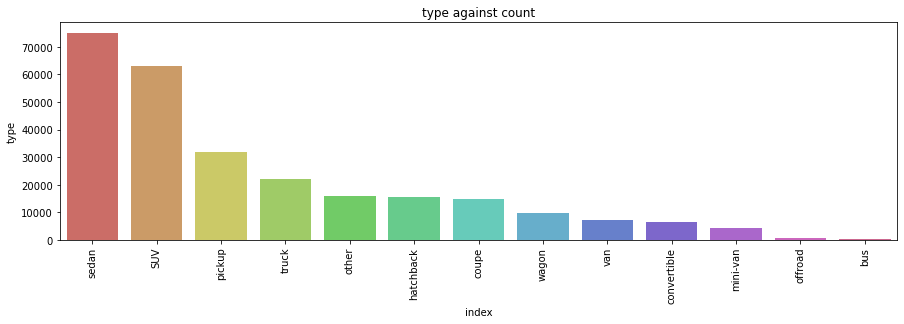

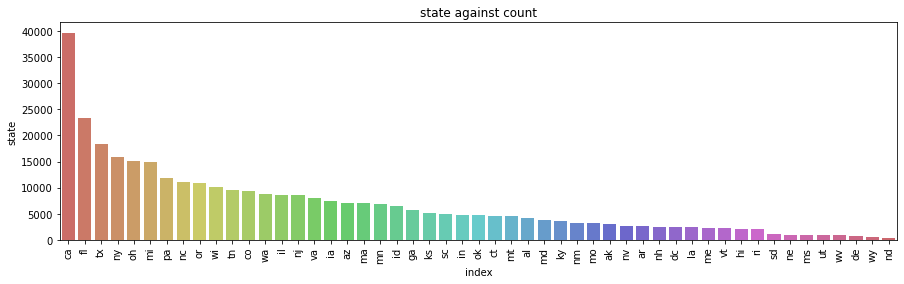

In [15]:
dataNoPrice2 = dataNoPrice[["manufacturer","fuel","title_status","transmission","type","state"]]
for col in dataNoPrice2:
    df2 = dataNoPrice2[col].value_counts().reset_index()
    plt.figure(figsize =(15,4))
    ax = sns.barplot(x="index", y=col, data=df2, palette = "hls" )
    tick2 = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    title2 = ax.set_title(str(col)+" against count")
    plt.show()

From this I will discard __fuel__, __title_status__ and __transmission__. As there is large varitations in counts between the categories so that the random forest will not produce a meaningful split. 

## 2.3 Using a mini Model to get good features.

After my quick analysis I still have the following features as good canidates:

###### Odometer

###### Year

###### Manufacturer

###### Type

###### State

I will run these through a small random forest that uses 25 estimators and 5% of the raw data that will be used in the traning split to evaluate the feature importances of these 5 features. Using these values I can then feed in the top 4 most important features and plug them into the final model. 

To filter out the top 4 features I will create a small model using 5% of the data and 25 estimators. Then using the importance values of the tree model to find the most optimal features:



In [16]:
dataToMiniModel = rawdata[["price","odometer","year","manufacturer","type","state"]] 
dataToMiniModel = dataToMiniModel.dropna()
dataToMiniModel = dataToMiniModel.sort_values(by=["price"])
p1,p2 = np.percentile(datatoClean["price"],[10,90])
print(p1,p2)
dataToMiniModel = dataToMiniModel[(dataToMiniModel.price >= p1)&(dataToMiniModel.price <= p2)]

dataToMiniModel = pd.get_dummies(dataToMiniModel)

model = RandomForestRegressor(n_estimators = 25,random_state=3597)

X = dataToMiniModel.loc[:, dataToMiniModel.columns != "price"]
y = dataToMiniModel[["price"]]

#taking 5% of the data to run the mini model on

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.95,random_state=3597)

m = model.fit(X_train,np.ravel(y_train))

3995.0 30990.0


In [17]:
mscore = 0
titlescore = 0
typescore = 0
sscore = 0
#Combining importance scores for each category
for name, score in zip(X_train, model.feature_importances_ ) :
    if name[0:5]=="manuf":
        mscore = mscore + score
    
    elif name[0:5]=="state":
        sscore = sscore + score 
    
    elif name[0:4]=="type":
        typescore = typescore + score
        
    else:
        print (str(name)+": " +str(score) )      
print("manufacturer score: ",mscore)
print("state score: ",sscore)
print("type score: ",typescore)


odometer: 0.22864111567285456
year: 0.37534020234317217
manufacturer score:  0.12797248304335831
state score:  0.10397158085723418
type score:  0.164074618083381


From this the best 4 features are __year__, __odometer__, __type__, __manufacturer__

# 3 Model Parameters

### 3.1 n_estimators
Fitting a random forest to the data with a 80% train, 20% test split. 
Now the main parameter I will be dealing with I will need to chose and appropriate number of estimators.


In [18]:
#Fresh Data:
data = rawdata[["price","year","manufacturer","odometer","type"]]

#Cleaning Data:
data = data.dropna()
data = data.sort_values(by=["price"])
p1,p2 = np.percentile(data["price"],[10,90])

data = data[(data.price >= p1)&(data.price <= p2)]

data = pd.get_dummies(data)

X = data.loc[:, data.columns != "price"]
y = data[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 3597)

# Now get another split from the training data to test for n-estimators:
#Note we will get 1 split to get a small sample of the training set 
#as we do not want to use the Full training set for each loop when determining no of estimators

X_nEst , X_split , y_nEst , y_split = train_test_split(X_train,y_train,test_size = 0.8 )

In [19]:
x_trainn, x_testn, y_trainn, y_testn = train_test_split(X_nEst,y_nEst,test_size = 0.2,random_state = 3597)
error = []
x_i = []
for i in range(1,14):
    model = RandomForestRegressor(n_estimators = i**2 ,random_state=3597)
    model.fit(x_testn, np.ravel(y_testn))
    #predictions:
    pred_nest = model.predict(x_testn)
    #calculating errors:
    mse = mean_squared_error(y_testn, pred_nest)
    error.append(np.sqrt(mse))
    x_i.append(i**2)

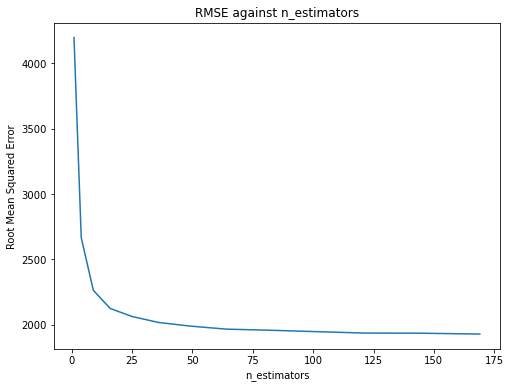

In [20]:
#Plotting the errors against the number of estimators
plt.figure(figsize =(8,6))
ax = plt.plot(x_i,error)
limx = plt.xlabel("n_estimators")
limy = plt.ylabel("Root Mean Squared Error")
ptitle = plt.title("RMSE against n_estimators")

As we can see the error difference between n_estimators = 100 and n_estimators = 175 is minimal. Therefore for my model I will go for n_estimators = 125 as this will provide a small error without being unnecessarily complex. 


# 4. Fitting the Final Model

## 4.1 Fitting the model and comparing to test data

Fitting a Random Forest with 125 estimators using the training data with is 80% of the test 


In [21]:
model = RandomForestRegressor(n_estimators = 125, random_state = 3597)
m = model.fit(X_train,np.ravel(y_train))

Predicting prices using the X_test data and comparing this to the y_test data which is the true data that corresponds to the X_test which consists of 20% of the data

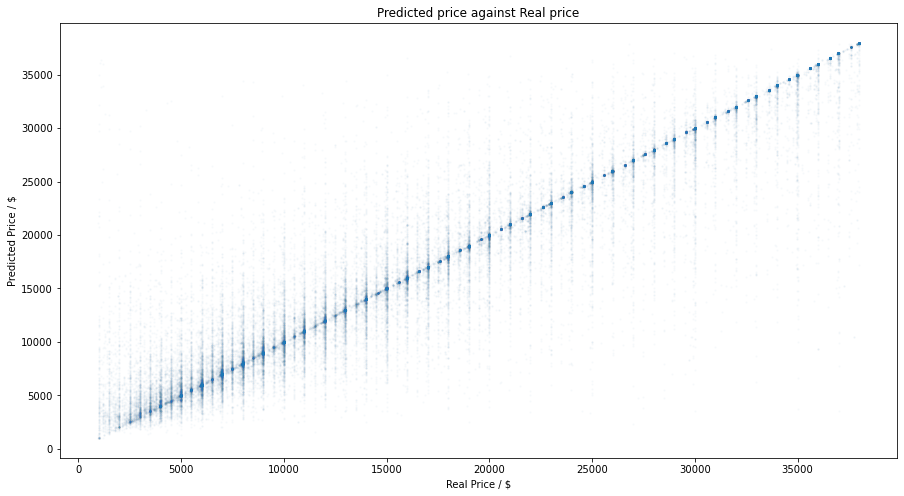

In [22]:
predictions = model.predict(X_test)
plt.figure(figsize =(15,8))
p= plt.scatter(y_test,predictions,alpha=0.02,s=2)
px = plt.xlabel("Real Price / $")
py = plt.ylabel("Predicted Price / $")
title = plt.title("Predicted price against Real price")

## 4.2 Calculating the RMS error 

I will be using the Root mean squared error as my measure of success of the model as compared to the mean error this gives stronger weighting to larger errors. 

In [23]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root mean Squared Error: $"+str(int(rmse)))

#Standard Deviation of the test data: 
meanOfYtest = y_test.mean()
print("Mean price of test data: $"+str(int(meanOfYtest[0])))



Root mean Squared Error: $3592
Mean price of test data: $16786


As you can see we have an root mean squared error of $3592 when making predictions on the cleaned data. 

In [24]:
print("Percentage of data used to traint the model: "+str(int((X_train.shape[0]/rawdata.shape[0])* 100))+"%")
print("Percentage of data unseen by the model when training that it is tested against:  "+str(int((X_test.shape[0]/rawdata.shape[0])* 100))+"%")

Percentage of data used to traint the model: 48%
Percentage of data unseen by the model when training that it is tested against:  12%


As you can see we are using approximatly 48% of the data to train the model. 
Then the model is predicting an unseen 12% of the data set then these predictions are being compared to the true values of the data.